# Исследование для интернет-магазина "Стримчик"

**Описание проекта:**  
Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
Изучив данные за представленный год, необходимо спланировать рекламную компанию на следующие 365 дней.

**В процессе исследования мы:**  
- Ознакомимся с данными
- Сделаем предобработку данных - постараемся заполнить пропуски и избавиться от аномальных значений, посчитаем суммарные продажи во всех регионах
- Проведем исследовательский анализ данных:
 - Посмотрим сколько игр выпускалось в разные годы
 - Посмотрим как менялись продажи по платформам
 - Определим актуальный период
 - Выберем потенциально прибыльные платформы
 - Проанализируем влияние на продажи отзывов пользователей и критиков
- Составим портрет пользователя каждого региона:
 - Определим для каждогого региона самые популярные платформы и жанры
- Проверим гипотезы исследования
 
 
**Цель исследования:**  
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Изучение общей информации. 

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print("Количество дубликатов:", data.duplicated().sum())

Количество дубликатов: 0


**Что можно сказать, глядя на общую информацию?**  
В датасете 11 стобцов, 16715 строк.  
Названия столбцов стоит привести к нижнему регистру.  

Значительное число пропусков в данных есть в следующих столбцах:  
- оценка критиков
- оценка пользователей
- рейтинг от ассоциации ESRB

В некоторых столбцах указан неправильный тип данных:  
- Год релиза должен быть целым числом, а не дробным
- Оценка пользователя должна быть типа float64

Явных дубликатов не обнаружено.



### Предобработка данных.

In [6]:
#Приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

**Работа с пропусками**

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
#Посмотрим таблицу с пропущенным годом выпуска игры
data[data['year_of_release'].isna()]
#Посмотрим самые часто встречающиеся игры и проверим, в один ли год они выходят на разных платформах
display(data['name'].value_counts())
data[data['name'] == 'Need for Speed: Most Wanted']
data[data['name'] == 'FIFA 14']
data[data['name'] == 'Ratatouille']

Need for Speed: Most Wanted                  12
Ratatouille                                   9
Madden NFL 07                                 9
LEGO Marvel Super Heroes                      9
FIFA 14                                       9
                                             ..
Phantasy Star Nova                            1
Captain Tsubasa J: The Way to World Youth     1
Midtown Madness 3                             1
Call of Duty: The War Collection              1
Busou Renkin: Youkoso Papillon Park e         1
Name: name, Length: 11559, dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65.0,8,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56.0,tbd,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,tbd,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


In [9]:
data[data['genre'].isna()]
data[data['name'].isna()]

#Посмотрев на строки с пропусками в названии игры и жанра принятно решение эти строки удалить
data.dropna(subset=['name'], inplace=True)

In [10]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [11]:
#Рассмотрим значение 'tbd' в столбце с оценкой пользователей
data.query('user_score == "tbd"').head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


**TBD** - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено).  
Следовательно, такую оценку можно также считать пропуском и заменить на значение NaN:

In [12]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [13]:
#Пропущенные значения в столбце "рейтинг" заменим на слово "неизвестно". Такая замена уместна, так как тип столбца - object
data['rating'] = data['rating'].fillna('unknown')

**Пропуски в столбцах с оценками пользователей и критиков**

Причины таких пропусков стоит спрашивать у составителей датасета. 
Какие-то значения в значениях можно заменить, категоризируя соседний столбец и выводя медианные значения. Сделать это стоит при сильной корреляции двух столбцов (оценки критиков и оценки пользователей). В то же время, в большинстве случаев в строках отсутствует и оценка критиков и оценка пользователей.  

**Пропуски в столбцах с годом релиза**
  
Таких пропусков не так много (чуть более 1,5% датасета). Во многих строках с неизвестным годом релиза игры пропущены также важные значения - оценки критиков и пользователей. Принято решение эти строки удалить.  

In [14]:
data.dropna(subset=['year_of_release'], inplace=True)

**О пропусках**  
От определенного количества пропусков мы избавились.  
При этом, осталось достаточно много пустых значений.
Год релиза менять на медианное или среднее значение будет некорректно.  
Была идея заменить год релиза определенной игры на год выхода её же на другой платформе, но многие игры выходят в разное время на разных консолях. Объем пропусков с годом релиза небольшой, принято решение их удалить.
Что касается оценкок критиков, пользователей и рейтинге, их также нельзя заменить медианными и средними значениями, как и нулевыми, так как 0 это тоже оценка и рейтинг.  
Удалять такой объем данных ни в коем случае нельзя, поэтому оставляем как есть.

**Замена типов данных**

In [15]:
#Поменяем форматы данных в столбцах с  годом выхода и оценками пользователей
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].astype('float64')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


**Поиск неявных дубликатов**  
Неявные дубликаты могут содержаться в столбцах с названием жанра, а также платформы. Проверим:

In [17]:
sorted(data['genre'].unique())
sorted(data['platform'].unique())
#Названия многих платформ схожи, но дубликатов нет

#Еще раз взглянем на информацию о датасете с заменой типов и обработкой пропусков.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


**Подсчёт суммарных продаж во всех регионах и добавление их в отдельный столбец**

In [18]:
data.insert(8, "all_sales", (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']))

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknown


**Выводы по предобработке данных**  
В процессе подготовки данных мы:  
- привели названия стоблцов к нижнему регистру
- удалили две неинформативные строки
- изменили тип данных в столбцах с выходом игры и оценкой пользователей
- рассмотрели пропущенные данные:
 - пропуски есть в столбцах с датой выхода игры, с оценками критиков и пользователей, рейтингом
 - заменить их медианными или средними значениями будет некорректно
 - заполнить пропущенный год выхода игры значением для той же игры на другой платформе будет не всегда верно, так как на разных платформах игры выходят в разное время
 - пропуски в столбцах с рейтингом заменены на значение "неизвестно"
 - пропуски в столбцах с оценками пользователей и критиков можно было бы заменить медианными значениями по категориям в соседнем столбце (при доказанной сильной корреляции), но в подавляющем большинстве случаев менять значения все равно будет нечем, так как значения пропущены в обоих столбцах.
- создали отдельный столбец с суммой продаж по всем регионам

В итоге, было решено не удалять и менять строки с пропущенными значениями. Дубликатов в датасете не обнаружено, можно приступать к исследовательскому анализу данных.

In [20]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   all_sales        16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           16444 non-null  object 
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Исследовательский анализ данных.

**Количество игр, выпускавшееся в разные годы**

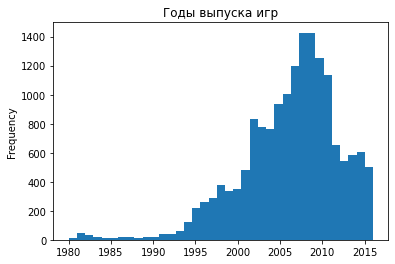

In [21]:
data['year_of_release'].plot(kind = 'hist',bins = 37)
plt.title('Годы выпуска игр')
plt.show()

Количество игр сильно увеличивалось, начиная с 1990-х годов, достигнув пика в 2008-2009-м. Дальше пошло снижение и значительное.  
Возможно, это связано, с тем, что студии-разработчики игр стали больше работать над качеством игр, чем над их количеством.  
Игры стали сложнее, увеличился срок разработки, в то же время, в десятые годы появилось больше возможностей зарабатывать на релизах внутри игрового процесса - если раньше студии должны были выпускать больше и больше игр, зарабатывая на продажах их копий, то сейчас в большей степени студии работают над усовершенствованием игры уже после её выпуска, добавлением различных функций, персонажей, патчей.  
Кроме того, увеличилось число мобильных игр, что явно отразилось на продажах игр для компьютеров и приставок.  

**Важны ли данные за все периоды?**
Можно с уверенностью утверждать, что игры, продавшиеся в 1980-х и 1990-х годах имеют мало общего с теми, что продаются в наше время. Как в плане разработки, так и в плане пост-продакшена игры.  
До 1995 года отрасль развивалось слабо, поэтому данные до этого периода не имеют большой значимости в прогнозах на будущее.  


**Суммарные продажи по платформам**

In [22]:
sales_by_platforms = data.pivot_table(
    index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
sales_by_platforms

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Возьмем платформы с наибольшими суммарными продажами (первые 6 явно оторвались от остальных) и построим распределение по годам.

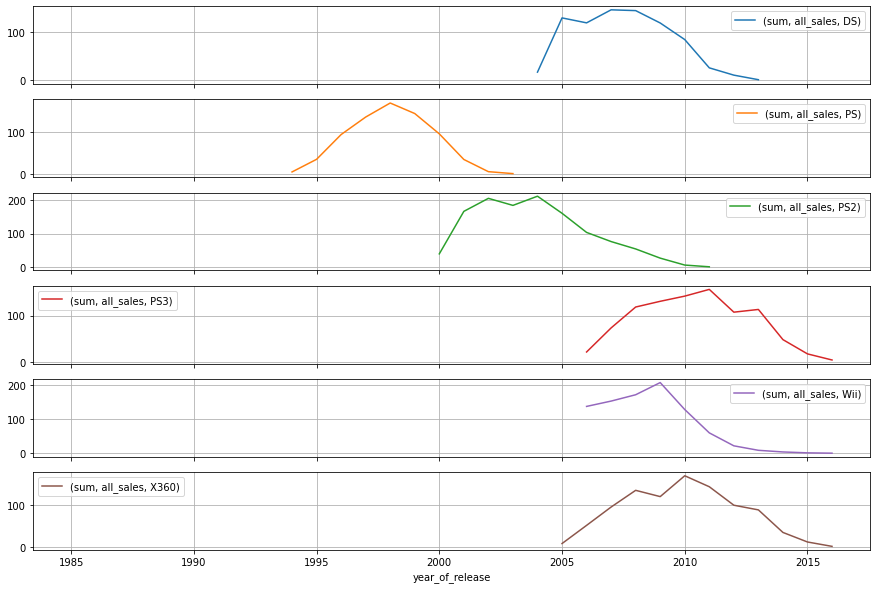

In [23]:
top_platforms = data.query('platform==["PS2","X360","PS3","Wii","DS","PS"]')
top_platforms_by_years =top_platforms.pivot_table(
                                 index = ['year_of_release'], \
                                 columns = ['platform'],
                                 values = ['all_sales'],
                                 aggfunc =  ['sum'])
top_platforms_by_years.plot(grid=True, subplots=True, figsize = (15,10))
plt.show()

На графиках мы видим характерные жизненные этапы для 6 самых популярных платформ. Каждая из них в какой-то момент достигает пика и после этого, продажи падают до практически нулевых значений. Срок жизни каждой из платформ - около 10 лет.

### **Работа с данными за актуальный период**.

Исходя из того, что средний срок жизни популярных платформ - около 10 лет, пика своего развития платформа достигает на 4-5 году существования, а игры обновляются довольно часто (например спортивные симуляторы - ежегодно), возьмём достаточно короткий период в 3 года (включая 2016-й).

In [24]:
actual_data = data.query('year_of_release >= 2013')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,unknown
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,unknown
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,unknown
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.01,NaN,NaN,unknown
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,unknown


**Какие платформы лидируют по продажам, растут или падают?**

In [25]:
actual_data.pivot_table(
    index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)


,all_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Платформ стало гораздо меньше. Лидеры за последние годы поменялись. Взглянем на этапы жизненных циклов всех платформ, чтобы определить потенциально прибыльные.  Для большей наглядности, сделаем это на одном графике

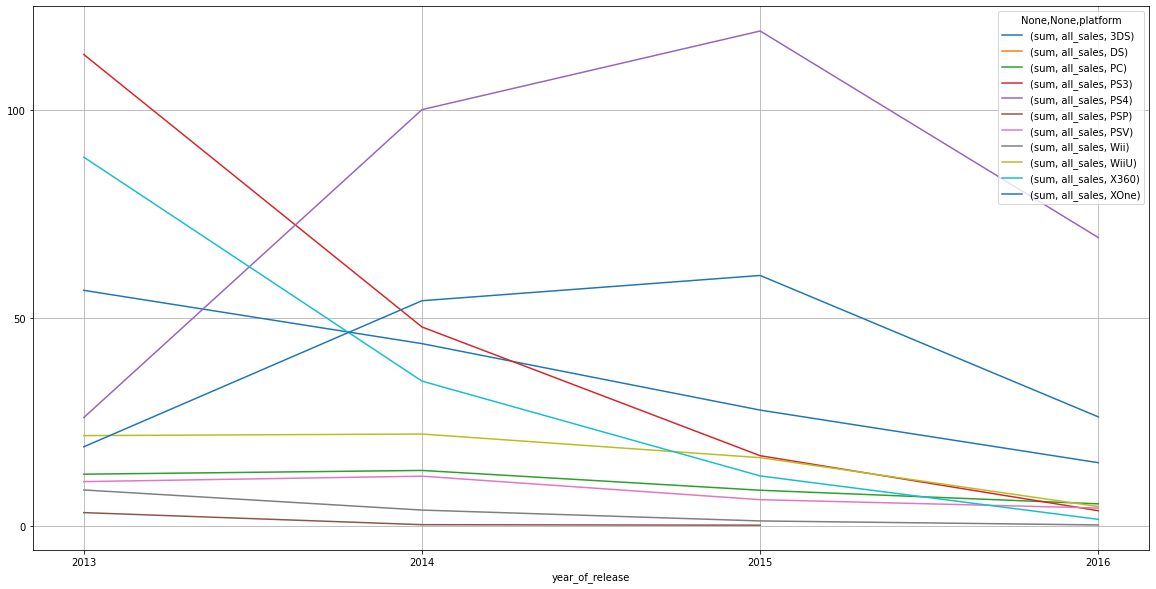

In [26]:
actual_platforms =actual_data.pivot_table(
                                 index = ['year_of_release'], \
                                 columns = ['platform'],
                                 values = ['all_sales'],
                                 aggfunc =  ['sum'])
actual_platforms.plot(grid=True, figsize = (20,10))
plt.locator_params(nbins=4)
plt.show()

**Основными платформами**, на которые можно делать ставку являются PS4 и XOne - они появились не так давно и еще имеют потенциал к продажам.

**«Ящик с усами»** по глобальным продажам игр в разбивке по платформам

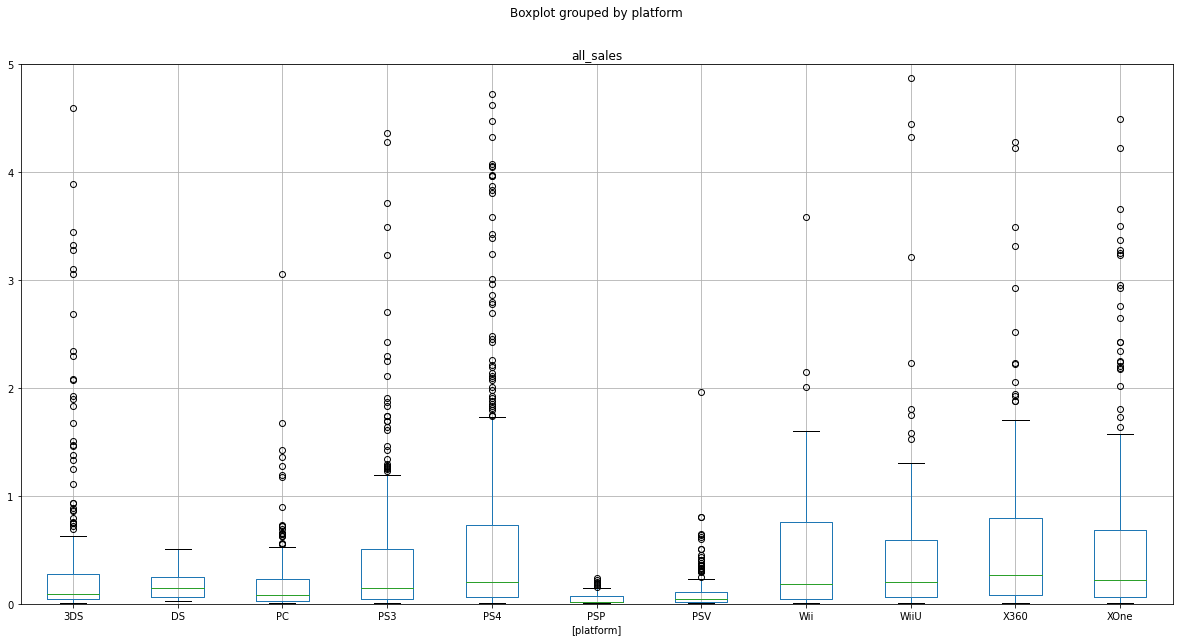

In [27]:
actual_data.boxplot(column = ['all_sales'],by = ['platform'],figsize=(20, 10))
plt.ylim(0, 5)
plt.show()

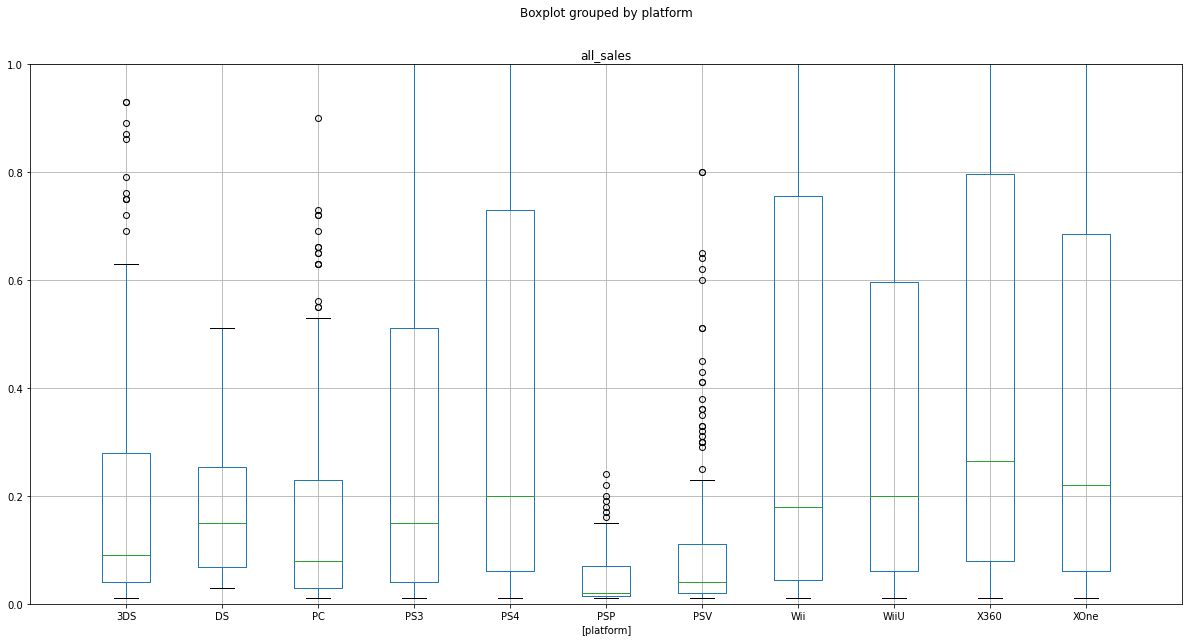

In [28]:
actual_data.boxplot(column = ['all_sales'],by = ['platform'],figsize=(20, 10))
plt.ylim(0, 1)
plt.xlim(0, 12) 
plt.show()

Медианные значения, а также значения третьего квартиля чуть выше, чем у остальных у платформ WiU, PS4, X360 и XOne

**Как влияют на продажи внутри платформы отзывы пользователей и критиков?**

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

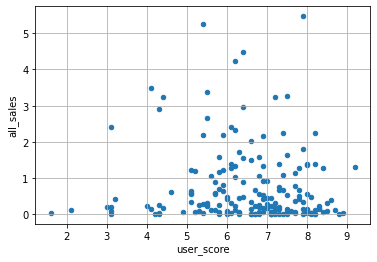

In [29]:
#Возьмем платформу XOne, отсортируем по оценке пользователей
actual_data.query('platform == "XOne"').plot(x='user_score', y='all_sales', kind='scatter', grid=True) 

In [30]:
print('Корреляция равна:', actual_data.query('platform == "XOne"')['user_score'].corr(actual_data.query('platform == "XOne"')['all_sales']))

Корреляция равна: -0.06892505328279414


Корреляция равна: 0.4169983280084017


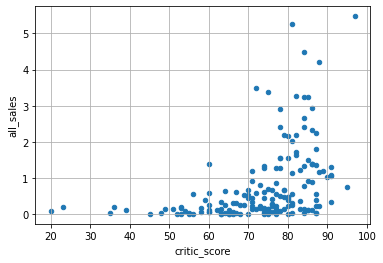

In [31]:
#Те же операции проделаем, что бы узнать как влияет оценка критиков
actual_data.query('platform == "XOne"').plot(x='critic_score', y='all_sales', kind='scatter', grid=True) 
plt.show
print('Корреляция равна:', actual_data.query('platform == "XOne"')['critic_score'].corr(actual_data.query('platform == "XOne"')['all_sales']))

**Вывод:**
Как видно из графика и как подтвержает корреляция, оценки пользователей и критиков не сильно влияют на продажи. В большей степени это касается оценок пользователей - корреляция их оценок с суммой продаж почти равна нулю. 

<function matplotlib.pyplot.show(close=None, block=None)>

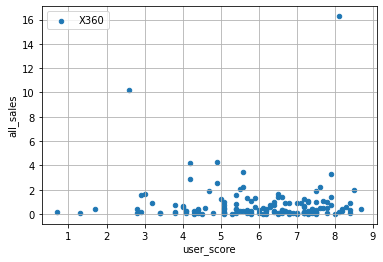

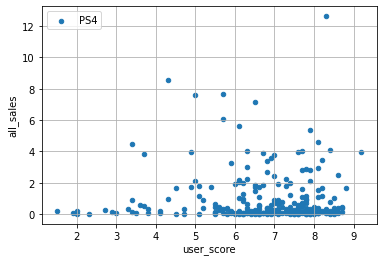

In [32]:
#Посмотрим, есть ли зависимость между оценками и продажами на двух других платформах - PS3 и PS4
actual_data.query('platform == "X360"').plot(x='user_score', y='all_sales', kind='scatter', grid=True, label='X360') 
plt.show
actual_data.query('platform == "PS4"').plot(x='user_score', y='all_sales', kind='scatter', grid=True, label='PS4') 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

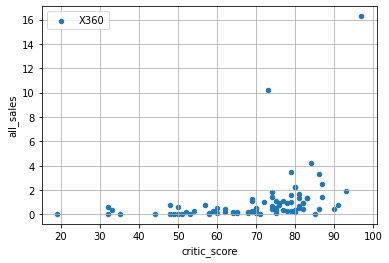

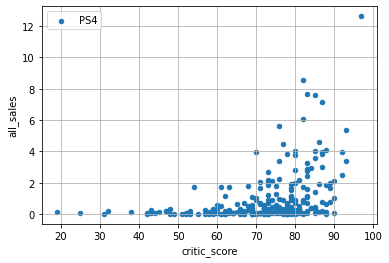

In [33]:
actual_data.query('platform == "X360"').plot(x='critic_score', y='all_sales', kind='scatter', grid=True, label='X360') 
plt.show
actual_data.query('platform == "PS4"').plot(x='critic_score', y='all_sales', kind='scatter', grid=True, label='PS4') 
plt.show

In [34]:
print('Корреляция оценок пользователей и продаж для X360 равна:', actual_data.query('platform == "X360"')
      ['user_score'].corr(actual_data.query('platform == "X360"')['all_sales']))
print('Корреляция оценок пользователей и продаж для PS4 равна:', actual_data.query('platform == "PS4"')
      ['user_score'].corr(actual_data.query('platform == "PS4"')['all_sales']))
print('Корреляция оценок критиков и продаж для X360 равна:', actual_data.query('platform == "X360"')
      ['critic_score'].corr(actual_data.query('platform == "X360"')['all_sales']))
print('Корреляция оценок критиков и продаж для PS4 равна:', actual_data.query('platform == "PS4"')
      ['critic_score'].corr(actual_data.query('platform == "PS4"')['all_sales']))

Корреляция оценок пользователей и продаж для X360 равна: -0.011742185147181342
Корреляция оценок пользователей и продаж для PS4 равна: -0.031957110204556376
Корреляция оценок критиков и продаж для X360 равна: 0.3503445460228664
Корреляция оценок критиков и продаж для PS4 равна: 0.40656790206178095


Итак, **корреляция** оценок пользователей и продаж X360 и PS4 очень слабая, корреляция продаж с оценками критиков - слабая

**Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах?  
Выделяются ли жанры с высокими и низкими продажами?**

In [35]:
actual_data.pivot_table(
    index='genre', values=['all_sales','name'], aggfunc={'all_sales': np.median, 
                                                        'name': 'count'}).sort_values(by='name', ascending=False)

,all_sales,name
genre,,
Action,0.110,766
Role-Playing,0.125,292
Adventure,0.030,245
Sports,0.240,214
Shooter,0.450,187
Misc,0.100,155
Racing,0.120,85
Fighting,0.125,80
Platform,0.225,74


Самые популярные игры за последние 3 года - экшн (с большим отрывом), аркады, спортивные, ролевые и приключенческие игры.
При этом, медианное значение продаж у экшнов не очень большое, гораздо меньше, чем у например шутеров.
Для большей наглядности, взглянем на эти жанры при помощи "ящика с усами":

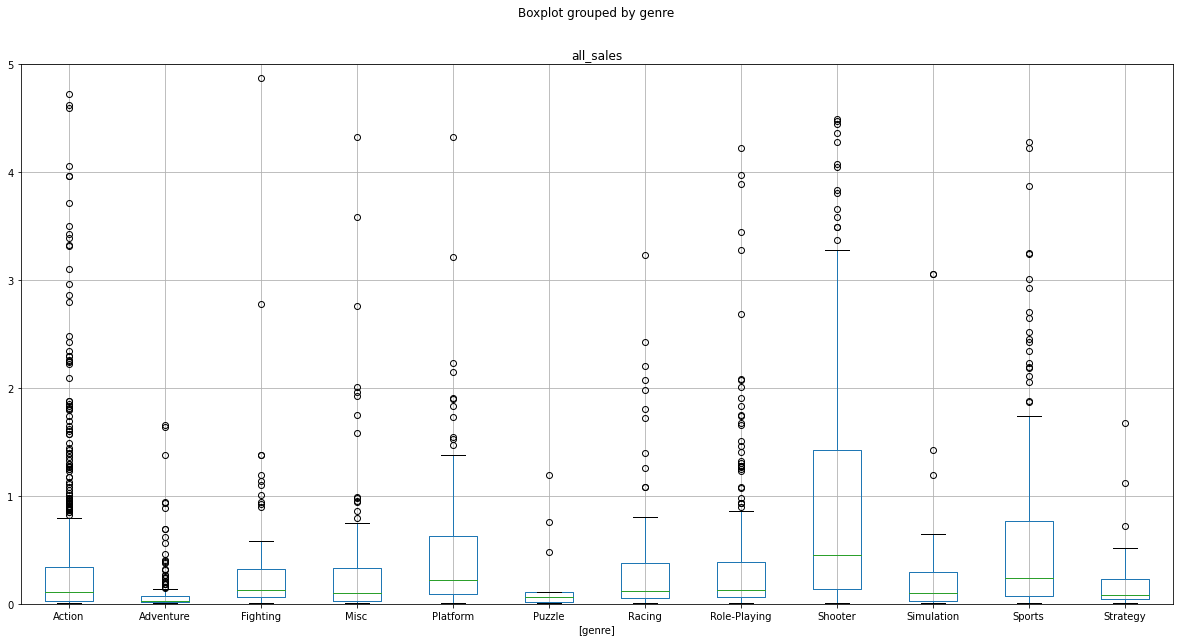

In [36]:
actual_data.boxplot(column = ['all_sales'],by = ['genre'],figsize=(20, 10))
plt.ylim([0, 5])
plt.show()

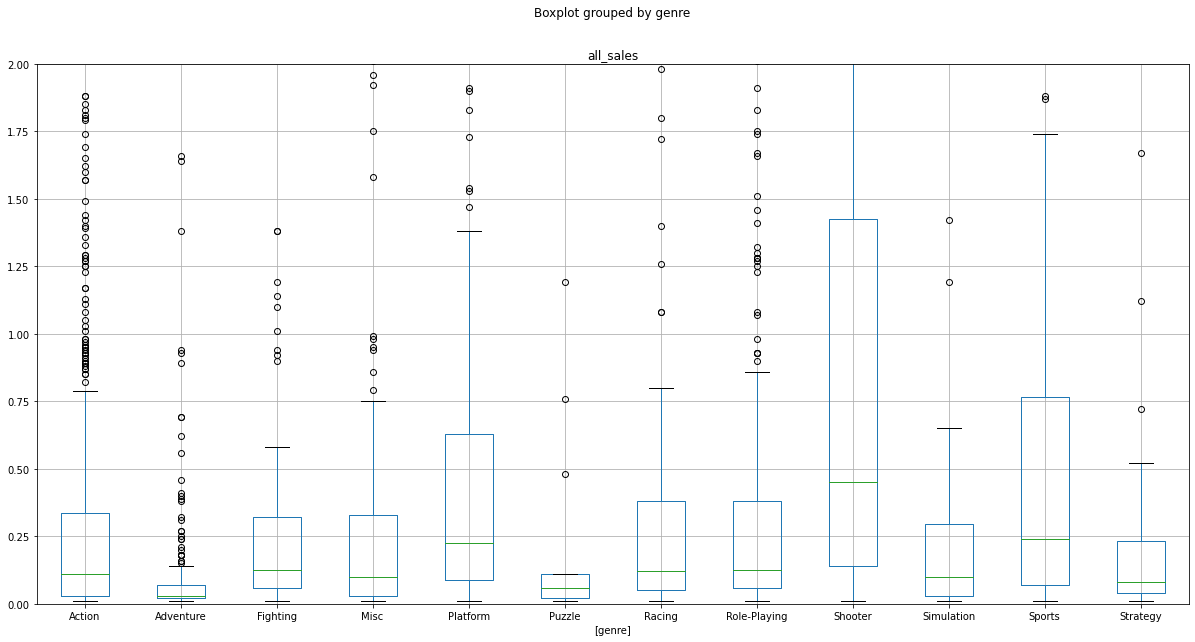

In [37]:
actual_data.boxplot(column = ['all_sales'],by = ['genre'],figsize=(20, 10))
plt.ylim(0, 2)
plt.show()

**Вывод:**
Жанр "Action", хоть и является самым кассовым в сумме, но достигается это за счёт количества продаж. Медианное значение наибольшее у шутеров - возможно на продвижение игр в этом жанре и стоит сделать ставку.

**Выводы по исследовательскому анализу данных:**
- До 1995 года выпускалось не так много игр, серьезный рост пошел в середине 1990-х и достигнул пика к концу нулевых. Начиная с 2010 года число релизов падает, что можно объяснить усложнением их разработки, добавлением новых игровых возможностей в уже существующих играх, а также возросшим числом мобильных приложений, отнимающих аудиторию у разработчиков игр для консолей.  
- Средний срок жизни игровой платформы - 10 лет. Пика продаж платформы достигают спустя 4-5 лет после выпуска и постепенно вытесняются более новыми моделями.  
- Игры часто перевыпускаются, платформы быстро достигают пика, индустрия очень динамична, в связи с этим актуальным периодом для исследования был выбран временной промежуток в 3 года.
- Основными платформами, на которые можно делать ставку являются PS4 и XOne - они появились не так давно и еще имеют потенциал к продажам.
- Лучшими по количеству общих продаж и их медианному значению являются консоли WiU, PS4, X360 и XOne.  
- Оценки пользователей не влияют на продажи игр. Оценки критиков влияют, но не сильно.
- Самые прибыльные жанры - жанры "action", спортивные и ролевые игры. Стоит отметить и шутеры - этих игр не так много, но продаются они очень хорошо.


### Составление портрета пользователя каждого региона.

**Самые популярные платформы для каждого региона**

In [38]:
#Создадим таблицы с продажами топ-5 платформ в различных регионах
na_platforms = actual_data.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
eu_platforms = actual_data.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
jp_platforms = actual_data.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

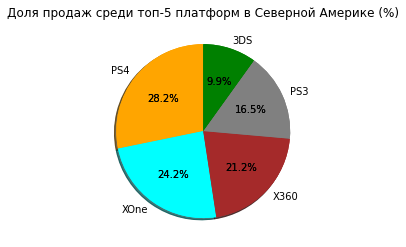

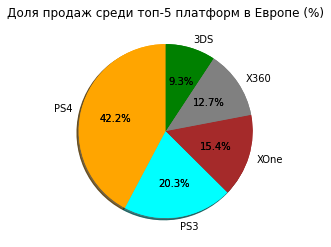

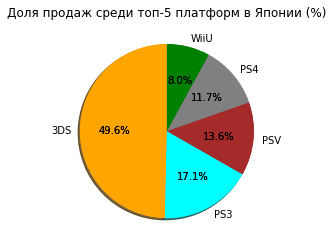

In [39]:
#Посмторим на доли продаж топ-5 платформ для каждого региона
labels = na_platforms.index.tolist()
shares = na_platforms['na_sales'].tolist()

colors = ( "orange", "cyan", "brown", 
          "grey", 'green') 
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0) 

ax1.pie(shares, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(shares, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.title('Доля продаж среди топ-5 платформ в Северной Америке (%)')
plt.show()

labels = eu_platforms.index.tolist()
shares = eu_platforms['eu_sales'].tolist()

colors = ( "orange", "cyan", "brown", 
          "grey", 'green') 
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0) 

ax1.pie(shares, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(shares, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.title('Доля продаж среди топ-5 платформ в Европе (%)')
plt.show()

labels = jp_platforms.index.tolist()
shares = jp_platforms['jp_sales'].tolist()

colors = ( "orange", "cyan", "brown", 
          "grey", 'green') 
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0) 

ax1.pie(shares, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(shares, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.title('Доля продаж среди топ-5 платформ в Японии (%)')
plt.show()

Как видно из диаграмм, в Европе и Северной Америке **топ-5 платформ** схожи. Почти половина продаж в Америке приходится на продукцию XBox, но самая популярная платформа - PS4. В топ-5 также встречается PS3 и 3DS. В Европе явно лидирует Sony, за ней приставки от XBox и 3DS.
В Японии ситуация несколько иная. Почти половину продаж от 5-консолей приходится на долю Nintendo 3DS. Также пользуются популярностью PS3 и PS4. Достаточно хорошо продаются и игры для портативной приставки PSV.

**Самые популярные жанры в каждом регионе**

In [40]:
#Создадим таблицы для каждого региона - топ-5 самых популярных жанров (по сумме продаж)
na_genres = actual_data.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
eu_genres = actual_data.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
jp_genres = actual_data.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

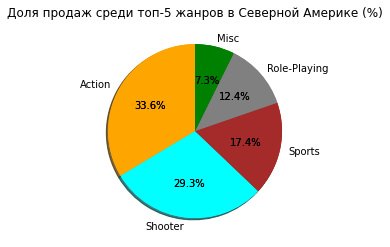

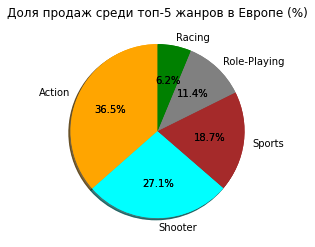

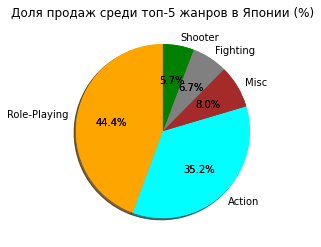

In [41]:
#Посмторим на доли продаж топ-5 жанров для каждого региона
labels = na_genres.index.tolist()
shares = na_genres['na_sales'].tolist()

colors = ( "orange", "cyan", "brown", 
          "grey", 'green') 
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0) 

ax1.pie(shares, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(shares, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.title('Доля продаж среди топ-5 жанров в Северной Америке (%)')
plt.show()

labels = eu_genres.index.tolist()
shares = eu_genres['eu_sales'].tolist()

colors = ( "orange", "cyan", "brown", 
          "grey", 'green') 
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0) 

ax1.pie(shares, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(shares, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.title('Доля продаж среди топ-5 жанров в Европе (%)')
plt.show()

labels = jp_genres.index.tolist()
shares = jp_genres['jp_sales'].tolist()

colors = ( "orange", "cyan", "brown", 
          "grey", 'green') 
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0) 

ax1.pie(shares, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(shares, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.title('Доля продаж среди топ-5 жанров в Японии (%)')
plt.show()

Ситуация **с самыми популярными жанрами** в Северной Америке и Европе практически одинаковая - самый популярный жанр - Action, затем игры где можно пострелять, далее спортивные игры. 4 место за ролевыми играми, на пятом в США аркады, а в Европе гонки.  
В Японии расклад иной. Игры в жанре Action также популярны, но при этом они только на втором месте после ролевых игр. Спортивные игры японцами не очень востребованы, вместо них в топ-5 есть игры жанра "Fighting".  Аркады, как и в США набирают около 7-8 процентов, а шутеры занимают скромную пятую позицию.  

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

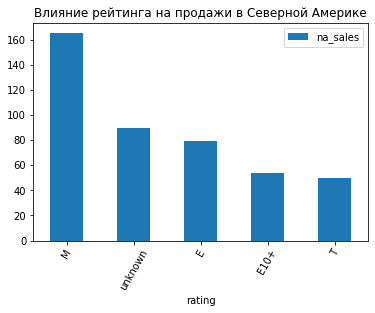

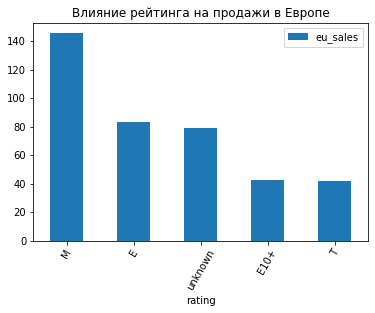

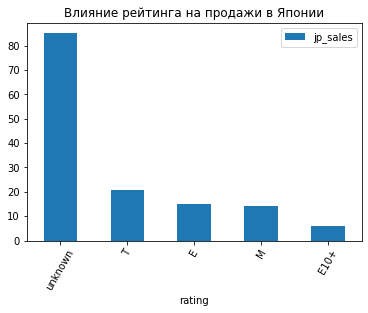

In [42]:
#Посмотрим на влияние рейтинга ESRB:
actual_data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).plot(kind='bar', rot = 60, title = 'Влияние рейтинга на продажи в Северной Америке')
actual_data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).plot(kind='bar', rot = 60, title = 'Влияние рейтинга на продажи в Европе')
actual_data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).plot(kind='bar', rot = 60, title = 'Влияние рейтинга на продажи в Японии')
plt.show()

**Рейтинг влияет** на продажи в каждом из регионов.  
Во-первых стоит отметить, что рейтинг ESRB предназначен для маркировки североамериканских игр, поэтому неудивительно большое количество продаж игр без рейтинга в Европе и особенно, в Японии.
Вновь видно сходство Северной Америки и Европы. Больше всего денег приносят игры категории M - для взрослых. 
В Японии на лидирующих позициях игры для подростков (T) и для всех (E).  
Игры для детей от 10 лет (E10+) в Европе и Америке находятся на одном уровне с играми для тинейджеров, а вот в Японии они представлены гораздо меньше.

**Портрет пользователя каждого региона:**  
Жители США и Канады схожи с жителями Европы, а вот японские геймеры отличаются от своих западных коллег.  
  
Итак, выводы по данным из **Северной Америки:**  
Самая популярная платформа - PS4. Далее следует X360, XOnePS3, Wii.  
Самый популярный жанр - Action. Немного отстают шутеры. Также в топ-5 спортивные и ролевые игры и аркады.  
Самый популярный рейтинг - M (для взрослых). Он значительно опережает все остальные игры. 

  
Выводы по данным из **Европы:**  
Самая популярная платформа - PS4. За ней следуют PS3, X360, XOne и 3DS 
Самый популярный жанр - Action. В своих предпочтениях европейцы похожи на североамериканцев, в топ-5 также есть шутеры, спортивные и ролевые игры, а вместо аркад - гонки.  
С рейтингом такая же ситуация, как и в Северной Америке. Лидируют игры с рейтингом M (для взрослых). Достаточно большая доля у игр с рейтингом E (для всех), далее идут игры для  детей и подростков.  
  
Выводы по данным из **Японии:** 
Портрет среднего японца отличается от портрета среднего европейца или американца.  
Самая популярная в Японии консоль - местная Nintendo 3DS. Также большим спросом пользуется PS3. В топ-5 входят PS4, WiiU и PSV. Отметим любовь японцев к портативным консолям (PSV) - такого большого процента продаж игр для этой платформы нет ни в Европе ни в Америке.  
Главный игровой жанр для японцев - ролевые игры. На них приходится почти половина от продаж топ-5 жанров. Еще треть на игры в стиле Action. Оставшиеся в топ-5 жанры это аркады, файтинги и шутеры.  
Самые популярный рейтинг для игр в Японии - T. Игры только для взрослых здесь пользуются меньшим спросом, чем на Западе, уступая также и играм для всех. Однако, надо сказать, что большинство игр, продающихся в Японии не имеют ESRB рейтинга, поэтому говорить о каких-то возрастных тенденциях с большой долей уверенности трудно. 


### Проверка гипотез.

**Гипотеза №1.**  

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковы**

**Сформулируем нулевую и анльтернативную гипотезы:**

Нулевая гипотеза будет гласить о том, что средние пользовательские рейтинги для рассматриваемых платформ равны. Альтернативная гипотеза будет утверждать обратное. Итак:  

Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
H1: Средний пользовательский рейтинг платформ Xbox One и PC различается

Выборки между собой независимы, следовательно можно использовать t-test. Существует специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Его мы и используем

In [43]:
#Введём две переменные, оценки по двум интересующим нас платформам. Заодно посмотрим их среднее значение
xone_user_scores = actual_data[(actual_data['platform'] == 'XOne')]['user_score']
print("Средняя оценка пользователей XOne:", xone_user_scores.mean())
pc_user_scores = actual_data[(actual_data['platform'] == 'PC')]['user_score']
print("Средняя оценка пользователей PC:", pc_user_scores.mean())

Средняя оценка пользователей XOne: 6.521428571428572
Средняя оценка пользователей PC: 6.269677419354839


In [44]:
xone_user_scores.mean()

6.521428571428572

In [45]:
#задаём пороговый уровень статистической значимости
alpha = .05

#проведём тест и выведем результат
results = st.ttest_ind(xone_user_scores.dropna(), pc_user_scores.dropna(), equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод:**  
P-значение – это вероятность получить значение статистики критерия равное наблюдаемому или более нетипичное по сравнению с наблюдаемым при условии, что нулевая гипотеза верна. В нашем случае эта вероятность равна почти 15 процентам, нулевую гипотезу отвергнуть не удалось.  
Таким образом, можно считать, что статистической разницы между оценками пользователей для платформ XOne и PC нет. 

**Гипотеза №2**  
**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Сформулируем нулевую и альтернативную гипотезы, пользуясь той же логикой, что и в предыдущем пункте. 

H0: Средние пользовательские рейтинги жанров Action и Sports равны.  
H1: Средние пользовательские рейтинги жанров Action и Sports различаются

In [46]:
#Введём две переменные, оценки по двум интересующим нас жанрам. Заодно посмотрим их среднее значение
xone_user_scores = actual_data[(actual_data['platform'] == 'XOne')]['user_score']
action_user_scores = actual_data[(actual_data['genre'] == 'Action')]['user_score']
print("Средняя оценка пользователей для игр жанра Action:", action_user_scores.mean())
sports_user_scores = actual_data[(actual_data['genre'] == 'Sports')]['user_score']
print("Средняя оценка пользователей для игр жанра Sports:", sports_user_scores.mean())

Средняя оценка пользователей для игр жанра Action: 6.837532133676093
Средняя оценка пользователей для игр жанра Sports: 5.238124999999999


In [47]:
#Применим тот же тест, что и в первой гипотезе
alpha = .05
results = st.ttest_ind(action_user_scores.dropna(), sports_user_scores.dropna(), equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод:**  
Нулевая гипотеза отвергнута, следовательно принимаем альтернативную - средние пользовательские рейтинги жанров Action и Sports различаются.

### Общий вывод

Перед тем, как приступить к анализу данных была проведена их **предобработка:**  
- названия стоблцов приведены к нижнему регистру
- удалены две неинформативные строки
- изменен тип данных в столбцах с выходом игры и оценкой пользователей
- рассмотрели пропущенные данные:
- пропуски в столбцах с рейтингом заменены на значение "неизвестно"
- пропуски в столбцах с оценками пользователей и критиков оставлены без изменений
- создан отдельный столбец с суммой продаж по всем регионам

**Выводы по исследовательскому анализу данных:**
- Средний срок жизни игровой платформы - 10 лет. Пика продаж платформы достигают спустя 4-5 лет после выпуска и постепенно вытесняются более новыми моделями.  
- В связи с этим, актуальным периодом для исследования был выбран временной промежуток в 3 года.
- Основными платформами, на которые можно делать ставку являются PS4 и XOne - они появились не так давно и еще имеют потенциал к продажам.
- Лучшими по количеству общих продаж и их медианному значению являются консоли PS4, X360, XOne, WiiU.  
- Оценки пользователей не влияют на продажи игр. Оценки критиков влияют, но не сильно.
- Самые прибыльные жанры - жанры "action", спортивные и ролевые игры. Стоит отметить и шутеры - этих игр не так много, но продаются они очень хорошо.

В ходе исследованния был составлен **портрет пользователей каждого региона:**
- Предпочтения Европейцев и Североамериканцев схожи: самые популярные консоли в этих регионах - PS4, XOne и PS3, самые популярные жанры - Action и Shooter. Лучше всего продаются игры с рейтингом M (только для взрослых)
- В Японии ситуация иная. Самая популярная платформа - Nintendo 3DS, жанр - ролевая игра, рейтинг - T (для тинейджеров).

В тоже время, в каждом из регионов достаточно большая доля продаж приходится на игры без рейтинга - на них стоит обращать повышенное внимание.  

**В рамках проекта были проверены гипотезы:**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковы
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

В первом случае с утверждением можно согласиться: значительных статистических отличий между средними оценками у этих двух платформ нет.  
Второе утверждение также кажется верным - средние оценки для этих двух жанров не равны.  

Итак, опираясь на данные исследования можно отметить:  
- В данный момент наиболее перспективными платформами являются Sony Playstation 4 и Xbox One. Это консоли имеют ещё несколько лет "жизни".
- Самый перспективный жанр - Shooter. Игр этого жанра не так много, но среднее их продаж на порядок выше, чем у наиболее распространенных Action.

**Рекомендации для рекламного отдела:**
- Рекламу необходимо таргетировать по регионам:
-  Для Европы, США и Канады стоит сделать ставку на современные платформы от XBox и Sony, игры в жанре Shooter и Action с рейтингом M.
- Для Японии наиболее актуальны консоли от Nintendo, предпочтение стоит отдать ролевым играм без возрастных ограничений.
- Игры без рейтинга от ESRB хорошо продаются во всех регионах, на них также стоит обратить внимание

- Конкретные предложения по рекламным компаниям:
- Для США и Европы: шутеры, выпускаемые на PS4, без рейтинга или с рейтингом M
- Для Японии: ролевые игры на Nintendo 3DS, без рейтинга или с рейтингом E